<a href="https://colab.research.google.com/github/pravallikai/Evolution-of-musical-trends-using-py/blob/main/notebooks/12_Cluster_Deep_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

print("Files in /content:")
print(os.listdir("/content"))


Files in /content:
['.config', 'spotify_audio_features_1960_2019_clean.csv', 'outputs', 'spotify_pca_clusters.csv', 'sample_data']


Looking for clean dataset at: /content/spotify_audio_features_1960_2019_clean.csv
File exists? True

Loaded clean dataset.
Shape: (41106, 11)
First few columns: ['year', 'track', 'artist', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']

After dropping rows with NA in clustering features:
Shape: (41106, 11)

Standardized feature matrix shape: (41106, 8)


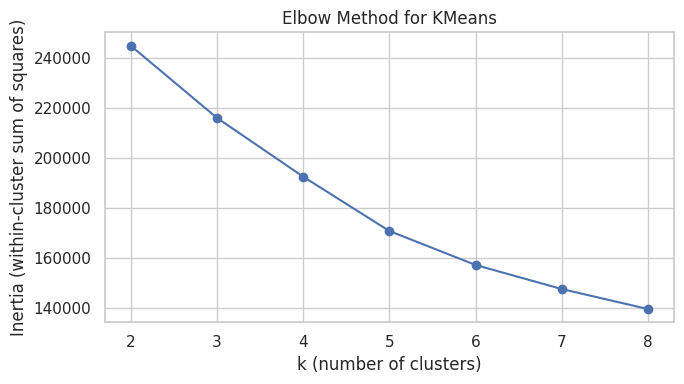

✅ Saved elbow plot to: /content/outputs/cluster_analysis/kmeans_elbow_plot.png

Running KMeans with k = 5 clusters...
Cluster value counts:
cluster
0     2328
1     9291
2     4276
3    15658
4     9553
Name: count, dtype: int64

✅ Saved dataset with cluster labels to: /content/outputs/spotify_audio_features_1960_2019_with_clusters.csv

Cluster mean feature values:
         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.683409  0.631373  -8.749922     0.351034      0.282848   
1            0.429117  0.790684  -6.922505     0.071760      0.095653   
2            0.353701  0.227750 -19.312166     0.047124      0.796893   
3            0.668574  0.683205  -8.458257     0.056632      0.229188   
4            0.484229  0.349127 -12.609755     0.044691      0.672812   

         instrumentalness   valence       tempo  
cluster                                          
0                0.0

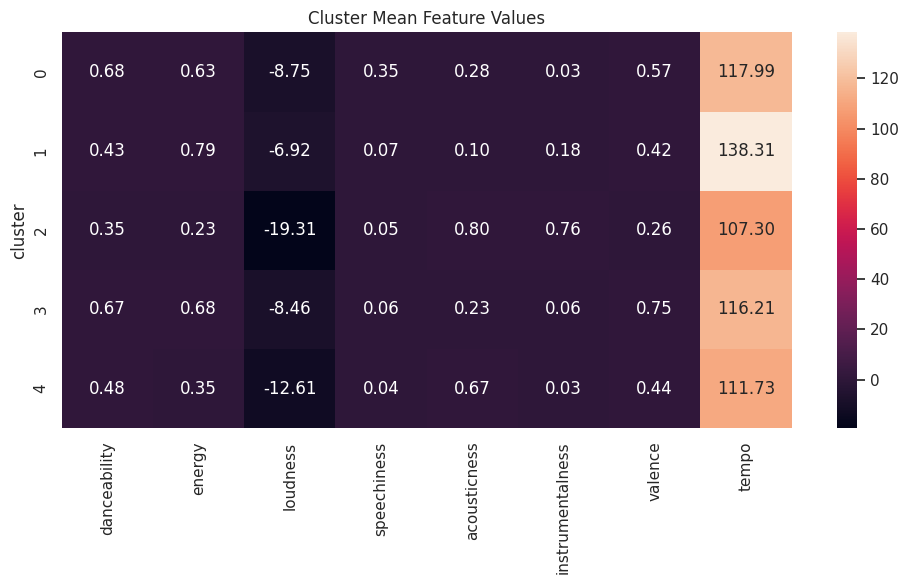

✅ Saved heatmap to: /content/outputs/cluster_analysis/cluster_means_heatmap.png

Cluster sizes (number of tracks per cluster):
cluster
0     2328
1     9291
2     4276
3    15658
4     9553
Name: count, dtype: int64
✅ Saved cluster sizes CSV to: /content/outputs/cluster_analysis/cluster_sizes.csv


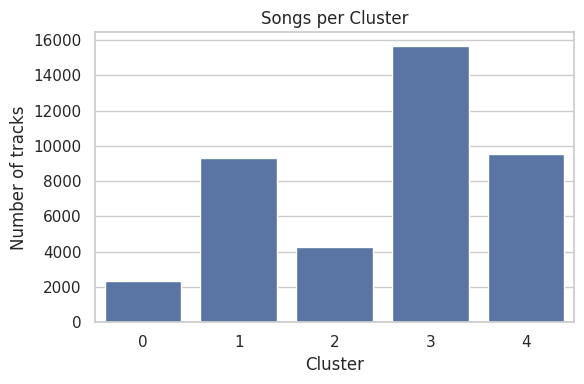

✅ Saved cluster size bar chart to: /content/outputs/cluster_analysis/cluster_sizes.png

Generating radar charts for each cluster...


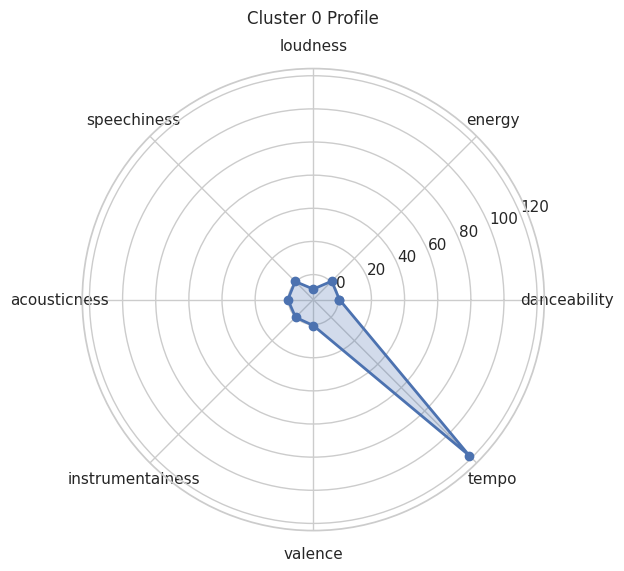

✅ Saved radar chart for cluster 0 to: /content/outputs/cluster_analysis/cluster_0_radar.png


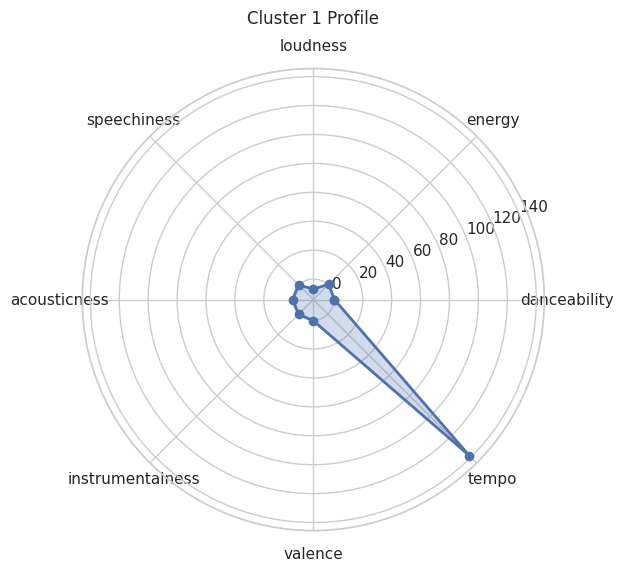

✅ Saved radar chart for cluster 1 to: /content/outputs/cluster_analysis/cluster_1_radar.png


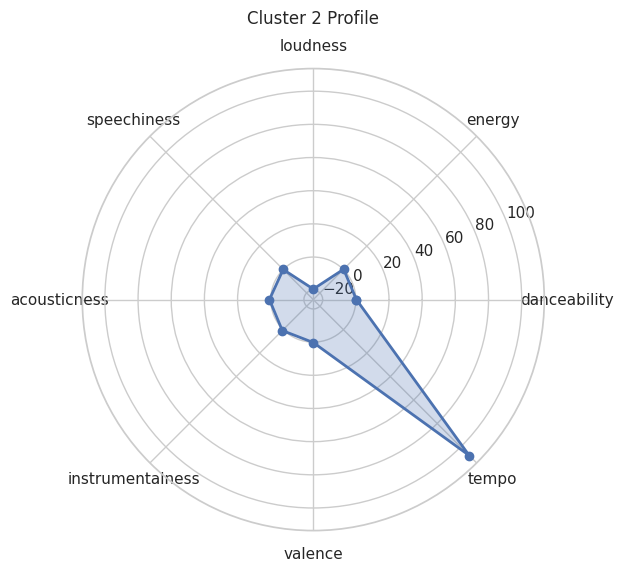

✅ Saved radar chart for cluster 2 to: /content/outputs/cluster_analysis/cluster_2_radar.png


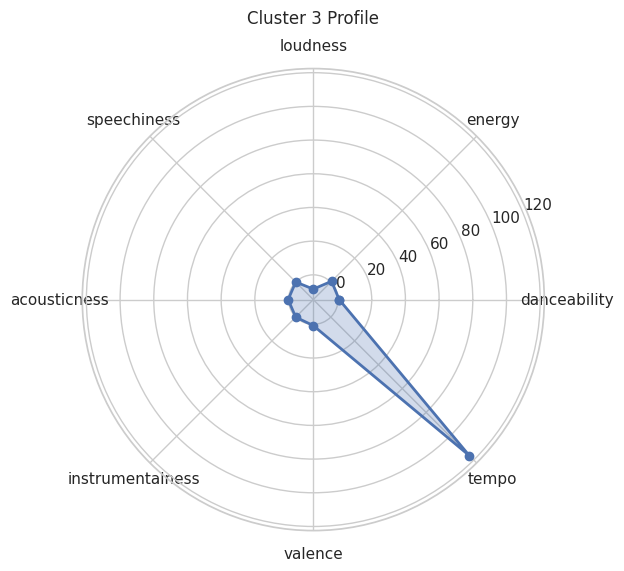

✅ Saved radar chart for cluster 3 to: /content/outputs/cluster_analysis/cluster_3_radar.png


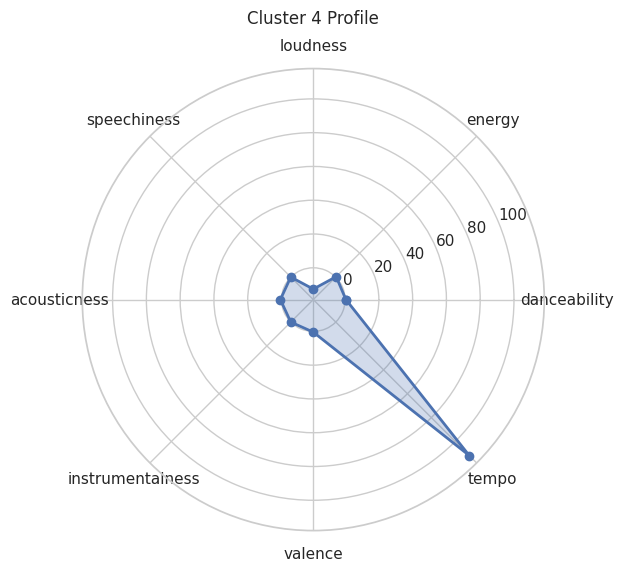

✅ Saved radar chart for cluster 4 to: /content/outputs/cluster_analysis/cluster_4_radar.png

✅ Cluster interpretations saved to: /content/outputs/cluster_analysis/cluster_interpretations.csv

Cluster interpretations preview:

cluster
0    moderate energy level. vocal-driven songs. hig...
1    high energy, likely upbeat or intense. strongl...
2    low energy, more relaxed or mellow. strong aco...
3    high energy, likely upbeat or intense. vocal-d...
4    low energy, more relaxed or mellow. strong aco...
Name: description, dtype: object

🎉 Notebook 12 — Self-contained Cluster Deep Analysis completed successfully.
All outputs are under: /content/outputs/cluster_analysis


In [ ]:
# ============================================
# NOTEBOOK 12 — Cluster Deep Analysis (SELF-CONTAINED)
# ============================================
# This notebook:
#   1. Loads the CLEAN dataset:
#        spotify_audio_features_1960_2019_clean.csv
#   2. Runs K-Means clustering on audio features
#   3. Summarizes each cluster (means, sizes)
#   4. Creates visualizations (heatmap, bar chart, radar charts)
#   5. Generates short text interpretations per cluster
#
# All outputs are saved under:
#   /content/outputs/cluster_analysis/
# ============================================

import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set(style="whitegrid")

# -----------------------------
# 1. Paths & output folders
# -----------------------------
BASE_DIR = "/content"   # Colab default working directory
CLEAN_FILE = os.path.join(BASE_DIR, "spotify_audio_features_1960_2019_clean.csv")

BASE_OUTPUT_DIR = os.path.join(BASE_DIR, "outputs")
CLUSTER_ANALYSIS_DIR = os.path.join(BASE_OUTPUT_DIR, "cluster_analysis")

os.makedirs(CLUSTER_ANALYSIS_DIR, exist_ok=True)

print("Looking for clean dataset at:", CLEAN_FILE)
print("File exists?", os.path.exists(CLEAN_FILE))

if not os.path.exists(CLEAN_FILE):
    raise FileNotFoundError(
        "❌ spotify_audio_features_1960_2019_clean.csv not found in /content.\n"
        "Please run Notebook 03 (Data Cleaning) or upload this file to Colab."
    )

# -----------------------------
# 2. Load clean data
# -----------------------------
df = pd.read_csv(CLEAN_FILE)
print("\nLoaded clean dataset.")
print("Shape:", df.shape)
print("First few columns:", df.columns.tolist()[:15])

# -----------------------------
# 3. Select features for clustering
# -----------------------------
cluster_features = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "valence",
    "tempo"
]

missing_features = [c for c in cluster_features if c not in df.columns]
if missing_features:
    raise ValueError(
        f"❌ Missing required feature columns for clustering: {missing_features}\n"
        "Make sure your cleaned dataset has these Spotify audio features."
    )

# Drop rows with NA in clustering features
df_cl = df.dropna(subset=cluster_features).copy()
print("\nAfter dropping rows with NA in clustering features:")
print("Shape:", df_cl.shape)

# -----------------------------
# 4. Standardize features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cl[cluster_features])

print("\nStandardized feature matrix shape:", X_scaled.shape)

# -----------------------------
# 5. OPTIONAL: Elbow method (to inspect k)
# -----------------------------
inertia = []
K_values = range(2, 9)

for k in K_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K_values, inertia, marker="o")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow Method for KMeans")
plt.tight_layout()
elbow_path = os.path.join(CLUSTER_ANALYSIS_DIR, "kmeans_elbow_plot.png")
plt.savefig(elbow_path, dpi=220)
plt.show()
print("✅ Saved elbow plot to:", elbow_path)

# -----------------------------
# 6. Run KMeans with chosen k
# -----------------------------
k = 5  # change if elbow suggests another value
print(f"\nRunning KMeans with k = {k} clusters...")

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cl["cluster"] = kmeans.fit_predict(X_scaled)

print("Cluster value counts:")
print(df_cl["cluster"].value_counts().sort_index())

# Merge back (same rows) to have full dataset with cluster
df_with_clusters = df_cl.copy()
clustered_path = os.path.join(BASE_OUTPUT_DIR, "spotify_audio_features_1960_2019_with_clusters.csv")
df_with_clusters.to_csv(clustered_path, index=False)
print("\n✅ Saved dataset with cluster labels to:", clustered_path)

# -----------------------------
# 7. Cluster summary (mean feature values)
# -----------------------------
cluster_summary = df_cl.groupby("cluster")[cluster_features].mean()
print("\nCluster mean feature values:")
print(cluster_summary)

summary_csv_path = os.path.join(CLUSTER_ANALYSIS_DIR, "cluster_summary_means.csv")
cluster_summary.to_csv(summary_csv_path)
print("✅ Saved cluster summary means to:", summary_csv_path)

# -----------------------------
# 8. Heatmap of cluster means
# -----------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f")
plt.title("Cluster Mean Feature Values")
plt.tight_layout()

heatmap_path = os.path.join(CLUSTER_ANALYSIS_DIR, "cluster_means_heatmap.png")
plt.savefig(heatmap_path, dpi=220)
plt.show()
print("✅ Saved heatmap to:", heatmap_path)

# -----------------------------
# 9. Cluster sizes
# -----------------------------
cluster_sizes = df_cl["cluster"].value_counts().sort_index()
print("\nCluster sizes (number of tracks per cluster):")
print(cluster_sizes)

sizes_csv_path = os.path.join(CLUSTER_ANALYSIS_DIR, "cluster_sizes.csv")
cluster_sizes.to_csv(sizes_csv_path, header=["count"])
print("✅ Saved cluster sizes CSV to:", sizes_csv_path)

plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values)
plt.xlabel("Cluster")
plt.ylabel("Number of tracks")
plt.title("Songs per Cluster")
plt.tight_layout()

sizes_plot_path = os.path.join(CLUSTER_ANALYSIS_DIR, "cluster_sizes.png")
plt.savefig(sizes_plot_path, dpi=220)
plt.show()
print("✅ Saved cluster size bar chart to:", sizes_plot_path)

# -----------------------------
# 10. Radar chart helper
# -----------------------------
def radar_plot(values, feature_labels, title, savepath=None):
    """
    Create a radar (spider) chart for a single cluster.
    values: 1D array of feature means
    feature_labels: list of feature names in same order as values
    """
    N = len(feature_labels)
    angles = np.linspace(0, 2 * math.pi, N, endpoint=False).tolist()

    # Close the circle
    values = list(values)
    values += values[:1]
    angles += angles[:1]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, polar=True)

    ax.plot(angles, values, marker="o", linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), feature_labels)
    ax.set_title(title, y=1.08)

    if savepath is not None:
        plt.savefig(savepath, dpi=220, bbox_inches="tight")
    plt.show()

# -----------------------------
# 11. Radar charts per cluster
# -----------------------------
print("\nGenerating radar charts for each cluster...")
feature_labels = cluster_features.copy()

for cl in sorted(df_cl["cluster"].unique()):
    vals = cluster_summary.loc[cl, feature_labels].values
    radar_path = os.path.join(CLUSTER_ANALYSIS_DIR, f"cluster_{cl}_radar.png")
    radar_plot(vals, feature_labels, f"Cluster {cl} Profile", savepath=radar_path)
    print(f"✅ Saved radar chart for cluster {cl} to:", radar_path)

# -----------------------------
# 12. Automated textual interpretation
# -----------------------------
def interpret_cluster(row):
    """
    Given a row of cluster mean features, produce a short human description.
    row: Series with index = cluster_features
    """
    text_parts = []

    # Energy
    if row["energy"] > 0.65:
        text_parts.append("high energy, likely upbeat or intense.")
    elif row["energy"] < 0.4:
        text_parts.append("low energy, more relaxed or mellow.")
    else:
        text_parts.append("moderate energy level.")

    # Acousticness
    if row["acousticness"] > 0.6:
        text_parts.append("strong acoustic character (guitars, pianos, organic instruments).")
    elif row["acousticness"] < 0.2:
        text_parts.append("strongly electronic or heavily produced sound.")

    # Instrumentalness
    if row["instrumentalness"] > 0.5:
        text_parts.append("mostly instrumental tracks with few or no vocals.")
    elif row["instrumentalness"] < 0.1:
        text_parts.append("vocal-driven songs.")

    # Danceability
    if row["danceability"] > 0.65:
        text_parts.append("highly danceable rhythm, suitable for dancing or clubs.")
    elif row["danceability"] < 0.4:
        text_parts.append("less danceable, possibly more narrative or experimental.")

    # Valence (mood)
    if row["valence"] > 0.6:
        text_parts.append("overall positive, bright, or happy mood.")
    elif row["valence"] < 0.4:
        text_parts.append("more negative, moody, or melancholic atmosphere.")

    # Tempo
    if row["tempo"] > 130:
        text_parts.append("generally fast tempo.")
    elif row["tempo"] < 90:
        text_parts.append("generally slow tempo.")

    return " ".join(text_parts)

cluster_interpretations = cluster_summary.apply(interpret_cluster, axis=1)
cluster_interpretations.name = "description"

interpretations_path = os.path.join(CLUSTER_ANALYSIS_DIR, "cluster_interpretations.csv")
cluster_interpretations.to_csv(interpretations_path, header=True)
print("\n✅ Cluster interpretations saved to:", interpretations_path)

print("\nCluster interpretations preview:\n")
print(cluster_interpretations)

print("\n🎉 Notebook 12 — Self-contained Cluster Deep Analysis completed successfully.")
print("All outputs are under:", CLUSTER_ANALYSIS_DIR)
